## Exercici 1
**Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.**

In [1]:
import pandas as pd
import numpy as np
dt = pd.read_csv("DelayedFlights.csv")
dt.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [2]:
dt['Cancelled'].unique()

array([0, 1], dtype=int64)

In [3]:
dt['TailNum'].unique()

array(['N712SW', 'N772SW', 'N428WN', ..., 'N75428', 'N75429', 'N78008'],
      dtype=object)

In [4]:
dt['CancellationCode'].unique()

array(['N', 'A', 'B', 'C'], dtype=object)

In [5]:
freq = dt['Cancelled'].value_counts() 
print(freq) 

0    1936125
1        633
Name: Cancelled, dtype: int64


In [6]:
freq1 = dt['CancellationCode'].value_counts() 
print(freq1) 

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64


In [7]:
dt['Diverted'].unique()

array([0, 1], dtype=int64)

In [8]:
freq2 = dt['CancellationCode'].value_counts() 
print(freq2)

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64


In [9]:
freq5 = dt.groupby(['DayOfWeek', 'Cancelled']).size() 
print(freq5)

DayOfWeek  Cancelled
1          0            290866
           1                67
2          0            260823
           1               120
3          0            262701
           1               104
4          0            289382
           1                69
5          0            323157
           1               102
6          0            223178
           1                78
7          0            286018
           1                93
dtype: int64


*Si que podem trobar que hi han 4 dies a la setmana que tenen més cancel.lacions que d'altres, que són el dimarts, dimecres, dijous i diumenge*

In [10]:
freq4 = dt.groupby(['Month', 'Cancelled']).size() 
print(freq4)

Month  Cancelled
1      0            183527
2      0            189534
3      0            200842
4      0            155264
5      0            153072
6      0            200914
7      0            182945
8      0            162648
9      0             95539
10     0            103466
       1                59
11     0            105469
       1                94
12     0            202905
       1               480
dtype: int64


*Les cancel.lacions es van produir sobretot els 3 últims mesos del any, el que es porta la palma és desembre, no sé on puc veure el perquè d'aquestes calcel.lacions*

In [41]:
dt.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

*Tenim 633 cancelacions de vols i molts nan, valors nuls, concetrats sobretot en els delays varios, esborro els valors nuls abans de fer la selecció aleatoria dels 200.000. Potser no és una bona decissió i estic fent un sesgo important Oo *

In [11]:
dt2 = dt.dropna(how='any')
dt2.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [12]:
# aquestes són les files que ha esborrat, quasi coincideixen amb les cancel-lacions
num_nuls = 1936758 - 1247486
print(num_nuls)

689272


In [13]:
# si revisem els cancel.lats ara ja només surt valors de cero, vols no cancel.lats
freq = dt2['Cancelled'].value_counts() 
print(freq) 

0    1247486
Name: Cancelled, dtype: int64


In [14]:
# Retiran els valors nuls, ara mateix en les cancellacions només surt el codi que es va produïr el vol*
freq = dt2['CancellationCode'].value_counts() 
print(freq) 

N    1247486
Name: CancellationCode, dtype: int64


In [16]:
# sel.leccionem la mostra de 200.000
dt1 = dt2.sample(n = 200000)
dt1.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1383151,4691739,2008,8,20,3,1132.0,1100,1248.0,1202,9E,...,10.0,21.0,0,N,0,0.0,0.0,14.0,0.0,32.0
1573427,5644580,2008,10,23,4,1930.0,1815,2044.0,1952,US,...,6.0,7.0,0,N,0,52.0,0.0,0.0,0.0,0.0
1190826,3976639,2008,7,10,4,2353.0,2025,107.0,2147,FL,...,5.0,12.0,0,N,0,0.0,0.0,0.0,0.0,200.0
1616320,5888561,2008,10,5,7,1524.0,1515,1836.0,1808,B6,...,6.0,35.0,0,N,0,7.0,0.0,19.0,0.0,2.0
1311662,4395024,2008,8,15,5,2116.0,2055,2300.0,2210,OH,...,9.0,24.0,0,N,0,21.0,0.0,29.0,0.0,0.0


In [47]:
columns_names = dt1.columns.values
columns_names

array(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'], dtype=object)

In [48]:
dt1['UniqueCarrier'].unique()

array(['AA', 'DL', 'FL', 'OO', 'WN', 'XE', 'CO', 'EV', 'OH', 'YV', 'MQ',
       'NW', 'US', '9E', 'AS', 'UA', 'F9', 'B6', 'HA', 'AQ'], dtype=object)

In [49]:
freq5_1 = dt1.groupby(['Origin', 'Dest']).size() 
print(freq5_1)

Origin  Dest
ABE     ATL     26
        CLE      5
        CLT      4
        DTW     18
        JFK      1
                ..
YUM     IPL      7
        LAS      1
        LAX     14
        PHX     33
        SLC      5
Length: 4820, dtype: int64


In [18]:
# després de veure les cancel-lacions per mesos, cambio la data i utilitzo un datatime per unificar-la
dt1["Data"] = pd.to_datetime(dict(year=dt["Year"], month=dt["Month"], day=dt["DayofMonth"]))

In [19]:
dt2 = dt1[['Data', 'ArrDelay', 'DepDelay', 'DayOfWeek', 'Origin', 'FlightNum', 'TailNum', 'Dest', 'Distance', 'AirTime', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' ]]
dt2.head()

,Data,ArrDelay,DepDelay,DayOfWeek,Origin,FlightNum,TailNum,Dest,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1383151,2008-08-20,46.0,32.0,3,ATL,2022,91619E,IAH,689,105.0,0.0,14.0,0.0,32.0
1573427,2008-10-23,52.0,75.0,4,CLT,1529,N195UW,DEN,1337,181.0,0.0,0.0,0.0,0.0
1190826,2008-07-10,200.0,208.0,4,ATL,143,N317AT,TPA,406,57.0,0.0,0.0,0.0,200.0
1616320,2008-10-05,28.0,9.0,7,EWR,537,N657JB,TPA,998,151.0,0.0,19.0,0.0,2.0
1311662,2008-08-15,50.0,21.0,5,CVG,5257,N398CA,DFW,812,131.0,0.0,29.0,0.0,0.0


*he seleccionat aquestes columnes, ja pensant en el exercici2. Tenim en compte que el bloc de les cancel.lacions ho he descartat abans.*

## Exercici 2
**Fes un informe complet del dataset:**

> Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.

> Troba quantes dades faltants hi ha per columna.

> Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).

> Fes una taula de les aerolínies amb més endarreriments acumulats.

> Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
Aporta allò que consideris rellevant.

In [20]:
# Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
dt2.describe()

,ArrDelay,DepDelay,DayOfWeek,FlightNum,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,63.356410,59.708535,3.984345,2276.531130,740.870695,107.400435,3.723650,14.941340,0.087935,25.439760
std,60.884283,59.983890,1.990954,1999.850598,558.256563,68.092933,21.570842,33.597785,1.850319,42.021353
min,15.000000,6.000000,1.000000,1.000000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,24.000000,2.000000,633.000000,334.000000,58.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,41.000000,4.000000,1588.000000,595.000000,90.000000,0.000000,2.000000,0.000000,9.000000
75%,79.000000,75.000000,6.000000,3683.000000,972.000000,136.000000,0.000000,14.000000,0.000000,34.000000
max,2453.000000,2467.000000,7.000000,9740.000000,4962.000000,654.000000,1225.000000,903.000000,209.000000,1236.000000


Aqui tenim una descripció de les columnes escollides, trobem valors de promig (mean) de cada columna, minims i màxims, i on es concentren més valors en tant per cent. 
Trobem que tots els delays tenen un minim de cero, però qui tenen els màxims més grans son el Weather, NAS i LateAircraft
Tenim els vols amb la distancia més llarga i més curta.


In [21]:
dt2.corr()

,ArrDelay,DepDelay,DayOfWeek,FlightNum,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelay,1.000000,0.950343,0.008962,0.035926,0.013249,0.025670,0.266083,0.384514,-0.007281,0.475737
DepDelay,0.950343,1.000000,0.011091,0.034969,0.012492,-0.001638,0.246283,0.228859,-0.007456,0.510088
DayOfWeek,0.008962,0.011091,1.000000,-0.009291,0.006916,0.004038,0.003620,-0.007277,0.005303,0.005448
FlightNum,0.035926,0.034969,-0.009291,1.000000,-0.363949,-0.348002,0.069987,0.013969,-0.004052,-0.049436
Distance,0.013249,0.012492,0.006916,-0.363949,1.000000,0.978208,-0.024319,0.018827,0.007861,-0.012724
AirTime,0.025670,-0.001638,0.004038,-0.348002,0.978208,1.000000,-0.019600,0.064142,0.008042,-0.023580
WeatherDelay,0.266083,0.246283,0.003620,0.069987,-0.024319,-0.019600,1.000000,-0.003459,-0.007828,-0.053617
NASDelay,0.384514,0.228859,-0.007277,0.013969,0.018827,0.064142,-0.003459,1.000000,-0.012525,-0.116495
SecurityDelay,-0.007281,-0.007456,0.005303,-0.004052,0.007861,0.008042,-0.007828,-0.012525,1.000000,-0.020697
LateAircraftDelay,0.475737,0.510088,0.005448,-0.049436,-0.012724,-0.023580,-0.053617,-0.116495,-0.020697,1.000000


He posat el dia de la setmana, pensant que potser habria correlació amb els delays alhora de sortir del avió (DepDelay, ArrDelay), i sí que té relació positiva, no massa forta amb els valors de Weather, NAS i LateAircraft

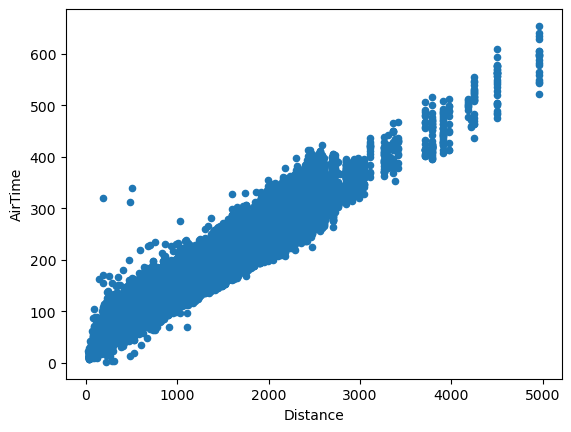

In [22]:
import matplotlib.pyplot as plt
my_plot = dt2.plot("Distance", "AirTime", kind="scatter")

In [23]:
# Troba quantes dades faltants hi ha per columna del dataset inicial.
dt.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [26]:
# Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
dt2["AverageSpeed"] = dt2["Distance"]/dt2["AirTime"]
dt2.head()

C:\Users\TAIDA\AppData\Local\Temp\ipykernel_15572\1869981721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2["AverageSpeed"] = dt2["Distance"]/dt2["AirTime"]


,Data,ArrDelay,DepDelay,DayOfWeek,Origin,FlightNum,TailNum,Dest,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AverageSpeed
1383151,2008-08-20,46.0,32.0,3,ATL,2022,91619E,IAH,689,105.0,0.0,14.0,0.0,32.0,6.561905
1573427,2008-10-23,52.0,75.0,4,CLT,1529,N195UW,DEN,1337,181.0,0.0,0.0,0.0,0.0,7.386740
1190826,2008-07-10,200.0,208.0,4,ATL,143,N317AT,TPA,406,57.0,0.0,0.0,0.0,200.0,7.122807
1616320,2008-10-05,28.0,9.0,7,EWR,537,N657JB,TPA,998,151.0,0.0,19.0,0.0,2.0,6.609272
1311662,2008-08-15,50.0,21.0,5,CVG,5257,N398CA,DFW,812,131.0,0.0,29.0,0.0,0.0,6.198473


In [27]:
dt2 = dt2.fillna(0)

In [28]:
dt2["Delay"] = ["Late" if n >=1 else "Justintime" for n in dt["DepDelay"]]

ValueError: Length of values (1936758) does not match length of index (200000)

*Aqui volia possar una columna que digues si eren vols amb delay o venien en temps just, no m'ha sortit i no només això, és que m'ha començat a fallar el notebook donant-me fallos, de memoria. He acabat per mostrar totes les taules només 5 valors*

In [29]:
# Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards. Aporta allò que consideris rellevant.
vols_llargs = dt2.sort_values('AirTime', ascending=False)
vols_llargs.head()

,Data,ArrDelay,DepDelay,DayOfWeek,Origin,FlightNum,TailNum,Dest,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AverageSpeed
556385,2008-03-27,89.0,66.0,4,EWR,15,N59053,HNL,4962,654.0,66.0,23.0,0.0,0.0,7.587156
556372,2008-03-12,21.0,14.0,3,EWR,15,N59053,HNL,4962,641.0,0.0,21.0,0.0,0.0,7.741030
1926817,2008-12-19,162.0,32.0,5,EWR,15,N67058,HNL,4962,634.0,32.0,130.0,0.0,0.0,7.826498
173822,2008-01-11,27.0,24.0,5,EWR,15,N78060,HNL,4962,629.0,0.0,3.0,0.0,0.0,7.888712
281891,2008-02-22,43.0,13.0,5,ATL,851,N831MH,HNL,4502,609.0,0.0,30.0,0.0,0.0,7.392447


In [30]:
# I els més endarrerits
vols_endarrerits = dt2.sort_values('DepDelay', ascending=False)
vols_endarrerits.head()

,Data,ArrDelay,DepDelay,DayOfWeek,Origin,FlightNum,TailNum,Dest,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AverageSpeed
686014,2008-04-10,2453.0,2467.0,4,CLT,1699,N3324L,MSP,930,132.0,0.0,0.0,0.0,17.0,7.045455
1497823,2008-09-01,1583.0,1552.0,1,OMA,512,N322US,MSP,282,75.0,0.0,31.0,0.0,0.0,3.760000
684233,2008-04-18,1291.0,1311.0,5,SAT,1064,N334NB,DTW,1215,147.0,0.0,0.0,0.0,0.0,8.265306
1716753,2008-11-02,1308.0,1286.0,7,LAS,1790,N244AA,STL,1372,159.0,0.0,22.0,0.0,92.0,8.628931
836938,2008-05-11,1263.0,1258.0,7,TPA,491,N521US,DTW,983,149.0,0.0,5.0,0.0,0.0,6.597315


In [32]:
# Busca les rutes més llargues 
distancia = dt2.sort_values('Distance', ascending=False)
distancia.head()

,Data,ArrDelay,DepDelay,DayOfWeek,Origin,FlightNum,TailNum,Dest,Distance,AirTime,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AverageSpeed
872331,2008-05-19,317.0,293.0,1,HNL,14,N67058,EWR,4962,549.0,0.0,24.0,0.0,0.0,9.038251
1620985,2008-10-18,21.0,40.0,6,EWR,15,N66057,HNL,4962,595.0,0.0,0.0,0.0,21.0,8.339496
1930578,2008-12-08,299.0,249.0,1,HNL,14,N68061,EWR,4962,583.0,0.0,50.0,0.0,0.0,8.511149
556358,2008-03-18,16.0,22.0,2,HNL,14,N66056,EWR,4962,522.0,0.0,0.0,0.0,0.0,9.505747
1257118,2008-07-12,34.0,51.0,6,EWR,15,N67052,HNL,4962,588.0,0.0,0.0,0.0,30.0,8.438776


## Exercici 3
**Exporta el dataset net i amb les noves columnes a Excel.**

In [35]:
dt2.to_excel('Tasca_M3_T02.xlsx')